<a href="https://colab.research.google.com/github/itwipsy/Nomad_Todolist.github.io/blob/main/n223a_evaluation_metrics_for_classification_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 3*

# 📝 Assignment
---

# Evaluation Metrics for Classification

### 1) Kaggle 챌린지를 이어서 진행합니다.
- **다음 조건에서 F beta score를 구하고 과제 제출폼에 제출하세요.**
    - TP = 4442, TN = 6165, FP = 1515, FN = 1930, 재현율에 정밀도의 2배 가중치를 부여합니다.

In [1]:
TP = 4442
TN = 6165
FP = 1515
FN = 1930
beta=2
b=beta**2
b

4

In [2]:
precison=TP/(TP+FP)
recall=TP/(TP+FN)
numerator=precison*recall
denominator=precison*b+recall
F_beta_score=(1+b)*numerator/denominator
F_beta_score

0.7063126093178566

#TP = 4442, TN = 6165, FP = 1515, FN = 1930, 재현율에 정밀도의 2배 가중치를 부여합니다.

In [3]:
import pandas as pd
import numpy as np

In [4]:
target = 'vacc_h1n1_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)

test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [5]:
from sklearn.model_selection import train_test_split

# 검증세트를 테스트세트와 크기와 같도록 만듭니다.
train, val = train_test_split(train, train_size=0.80, test_size=0.20, stratify=train[target], random_state=2)

train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [6]:
def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""
        
    # 새로운 특성을 생성합니다.
    behaviorals = [col for col in df.columns if 'behavioral' in col] 
    df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    
    # 계절독감(seas)에 대한 모델을 학습할 것이기 때문에 h1n1에 대한 특성을 제거합니다.
    dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    df.drop(columns=dels, inplace=True)

        
    return df


train = engineer(train)
val = engineer(val)
test = engineer(test)

In [7]:
! pip install category_encoders

In [8]:
from category_encoders import OrdinalEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [10]:
pip install --upgrade category_encoders

In [11]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 파이프라인을 만들어 봅시다.
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

검증 정확도:  0.8271853872612976


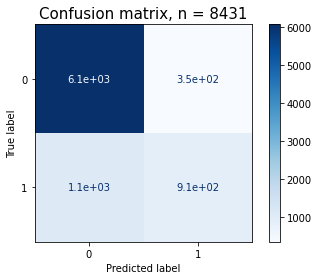

In [12]:
### 이곳에서 과제를 진행해 주세요 ### 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

#F beta score = 0.7063126093178566

### 2) 모델을 학습한 후 Confusion matrix를 그리고 해석하세요
- 임계값을 조정한 후 confusion matrix를 그려보세요
- **(객관식) 임계값을 증가시킬때 positive 범주에 대한 재현율의 변화 양상을 과제 제출폼에 제출하세요.**
    1. 증가
    2. 감소
    3. 변화가 없다


In [13]:
import seaborn as sns

False    7175
True     1256
dtype: int64

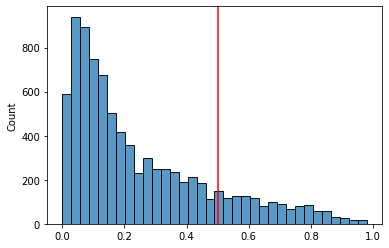

In [14]:
threshold = 0.5
y_pred_proba = pipe.predict_proba(X_val)[:, 1]
y_pred = y_pred_proba > threshold

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

False    7923
True      508
dtype: int64

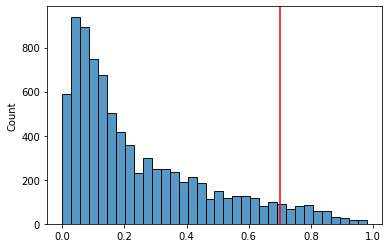

In [15]:
threshold = 0.7
y_pred_proba = pipe.predict_proba(X_val)[:, 1]
y_pred = y_pred_proba > threshold

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

In [29]:
# 재현율 확인 - 함수
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
def recall_check(model, X, y, threshold):
    
    confmat = confusion_matrix(y_true=y_val, y_pred=y_pred)
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred_threshold = y_pred_proba > threshold
    
    print('정밀도: %.3f' % precision_score(y_true=y, y_pred=y_pred_threshold)) 
    print('재현율: %.3f' % recall_score(y_true=y, y_pred=y_pred_threshold))

In [30]:
# 임계값(threshold)= 0.2
recall_check(pipe,X_val, y_val, 0.2)

정밀도: 0.436
재현율: 0.810


In [31]:
# 임계값(threshold)= 0.5
recall_check(pipe, X_val, y_val, 0.5)

정밀도: 0.726
재현율: 0.450


In [32]:
# 임계값(threshold)= 0.5
recall_check(pipe, X_val, y_val, 0.8)

정밀도: 0.833
재현율: 0.092


#재현율은 감소한다.

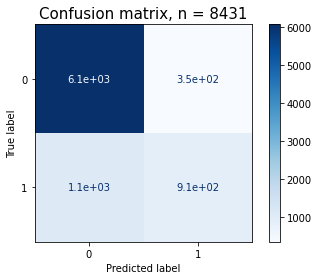

In [16]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

### 3) 랜덤포레스트의 n_estimator를 1, 10, 100, 1000으로 바꾸어 가며 positive 범주의 predict_proba를 비교해 보세요
- 파라미터는 다음과 같이 설정합니다.
    - n_jobs=-1, random_state=10, max_depth=None, n_estimators = n
- **(객관식) 확률값들의 분포(종류)의 변화를 과제 제출폼에 제출하세요**
    1. 다양해진다
    2. 변화가없다


In [56]:

n_est = [1]
for n in n_est:
    print('n_estimato값 :', n)
    pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = n)
    )

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    print('검증 정확도: ', accuracy_score(y_val, y_pred))
    y_proba_1 = pipe.predict_proba(X_val)[:, 1]
    print('proba: ', y_proba_1)

n_estimato값 : 1
검증 정확도:  0.733364962637884
proba:  [0. 1. 0. ... 0. 0. 1.]


In [54]:
n_est = [10]
for n in n_est:
    print('n_estimato값 :', n)
    pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = n)
    )

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    print('검증 정확도: ', accuracy_score(y_val, y_pred))
    y_proba_10 = pipe.predict_proba(X_val)[:, 1]
    print('proba: ', y_proba_10)

n_estimato값 : 10
검증 정확도:  0.8079705847467679
proba:  [0.2 0.3 0.4 ... 0.2 0.  0.6]


In [59]:
n_est = [100]
for n in n_est:
    print('n_estimato값 :', n)
    pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = n)
    )

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    print('검증 정확도: ', accuracy_score(y_val, y_pred))
    y_proba_100 = pipe.predict_proba(X_val)[:, 1]
    print('proba: ', y_proba_100)

n_estimato값 : 100
검증 정확도:  0.8254062388803226
proba:  [0.37 0.19 0.41 ... 0.09 0.03 0.36]


In [61]:
n_est = [1000]
for n in n_est:
    print('n_estimato값 :', n)
    pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = n)
    )

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)
    print('검증 정확도: ', accuracy_score(y_val, y_pred))
    y_proba_1000 = pipe.predict_proba(X_val)[:, 1]
    print('proba: ', y_proba_1000)

n_estimato값 : 1000
검증 정확도:  0.8278970466136876
proba:  [0.3562 0.164  0.336  ... 0.144  0.063  0.429 ]


In [40]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#확률값 분포가 n값의 변화에 따라 변한다.

### 4) 두개 이상의 다른 분류 모델을 학습시켜 ROC curve, AUC 점수를 비교하고 설명합니다.
- 더 좋은 결과가 나오는 모델을 사용해서 캐글에 제출하세요
- **캐글 Leaderboard의 본인 Score를 과제 제출폼에 제출하세요.**

In [36]:
y_proba.shape

(8431, 2)

In [38]:
y_val

18885    1
8587     0
17917    0
27985    0
917      0
        ..
25383    1
37833    0
6921     0
2706     0
17267    1
Name: vacc_h1n1_f, Length: 8431, dtype: int64

0.6420346079590107

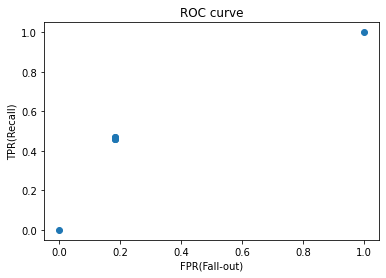

In [57]:
### 이곳에서 과제를 진행해 주세요 ### 


pipe = make_pipeline(
OrdinalEncoder(), 
SimpleImputer(), 
RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = 1)
)
from sklearn.metrics import roc_curve, roc_auc_score


auc_score_1 = roc_auc_score(y_val, y_proba_1)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_val, y_proba_1)

roc_1 = pd.DataFrame({'FPR(Fall-out)': fpr_1, 
                      'TPRate(Recall)': tpr_1, 
                      'Threshold': thresholds_1
})

plt.scatter(fpr_1, tpr_1)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_1

0.7952396845974394

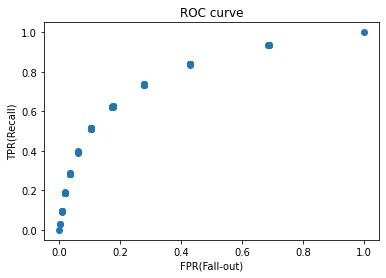

In [58]:

pipe = make_pipeline(
OrdinalEncoder(), 
SimpleImputer(), 
RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = 10)
)
from sklearn.metrics import roc_curve, roc_auc_score


auc_score_10 = roc_auc_score(y_val, y_proba_10)
fpr_10, tpr_10, thresholds_10 = roc_curve(y_val, y_proba_10)

roc_10 = pd.DataFrame({'FPR(Fall-out)': fpr_10, 
                      'TPRate(Recall)': tpr_10, 
                      'Threshold': thresholds_10
})

plt.scatter(fpr_10, tpr_10)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_10

0.8258743262810715

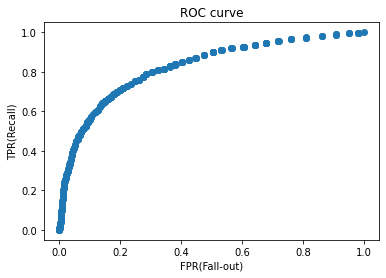

In [60]:
pipe = make_pipeline(
OrdinalEncoder(), 
SimpleImputer(), 
RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = 10)
)
from sklearn.metrics import roc_curve, roc_auc_score


auc_score_100 = roc_auc_score(y_val, y_proba_100)
fpr_100, tpr_100, thresholds_100 = roc_curve(y_val, y_proba_100)

roc_100 = pd.DataFrame({'FPR(Fall-out)': fpr_100, 
                      'TPRate(Recall)': tpr_100, 
                      'Threshold': thresholds_100
})

plt.scatter(fpr_100, tpr_100)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_100


0.8308455365927614

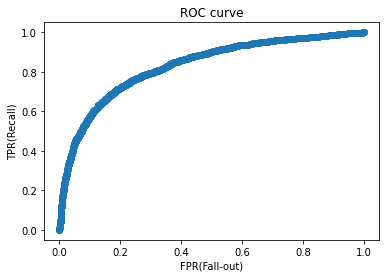

In [63]:
pipe = make_pipeline(
OrdinalEncoder(), 
SimpleImputer(), 
RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = 10)
)
from sklearn.metrics import roc_curve, roc_auc_score


auc_score_1000 = roc_auc_score(y_val, y_proba_1000)
fpr_1000, tpr_1000, thresholds_1000 = roc_curve(y_val, y_proba_1000)

roc_1000 = pd.DataFrame({'FPR(Fall-out)': fpr_1000, 
                      'TPRate(Recall)': tpr_1000, 
                      'Threshold': thresholds_1000
})

plt.scatter(fpr_1000, tpr_1000)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_1000

## 🔥 도전과제

### 5) 각 평가지표에 대해 결과를 최대한 분석하고 무엇이 부족한지, 어떤 방향으로 성능을 높여야 하는지 논하세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 